tensor([[0, 1],
        [0, 0]], dtype=torch.int32)


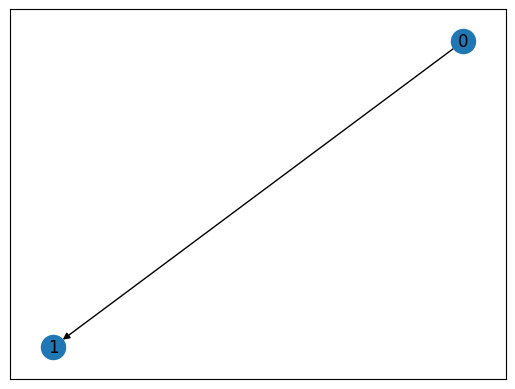

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import torch

from discrete_manufacturing_sim.multi_linear_petri_net import MultiLinearPetriNet
from discrete_manufacturing_sim.dg.wdg import WeightedDirectedGraph
from discrete_manufacturing_sim.fsm.production_asset_fsm import ProductionAssetFSM
from discrete_manufacturing_sim.simulation_handler import SimulationHandler
# from discrete_manufacturing_sim.multi_temporal_event_handler import MultiTemporalEventHandler
from discrete_manufacturing_sim.generators.dg_generator import DGGenerator
from discrete_manufacturing_sim.generators.distribution_data_generator import DistributionDataGenerator
from discrete_manufacturing_sim.generators.multi_distribution_sampler import MultiDistributionSampler
from discrete_manufacturing_sim.multi_temporal_event_handler import MultiTemporalEventHandler


num_nodes = 2
length_pns = 2

adj_gen = DGGenerator(num_nodes=num_nodes)


means = torch.ones(num_nodes, 3) * 10
means[0, 0] = 5


dist_gen = DistributionDataGenerator(means, distribution_types=['uniform'])


adjacency_matrix = adj_gen.generate_linear_dag()

print(adjacency_matrix)


G = nx.from_numpy_matrix(adjacency_matrix.numpy(), create_using=nx.DiGraph)

pos = nx.spring_layout(G)  # Positions for all nodes

nx.draw_networkx(G, pos, with_labels=True, arrows=True)
plt.show()

In [19]:


# Multi Petri Net
connectivity_graph = WeightedDirectedGraph(adjacency_matrix)
multi_lin_pn = MultiLinearPetriNet(
    length_pns=length_pns, connectivity_graph=connectivity_graph)

multi_lin_pn.set_capacity(1, 1, 1e10)
multi_lin_pn.set_capacity(0, 1, 5)

# State Machine
pfsm = ProductionAssetFSM()

# Temporal Event Handling
mds = MultiDistributionSampler(dist_gen)
mteh = MultiTemporalEventHandler(mds)


sim_handler = SimulationHandler(multi_lin_pn, pfsm, mteh)

for i in range(1000):
    print(sim_handler.multi_temp_event_handler.runtime)
    sim_handler.mlin_pn.print_state()
    sim_handler.simulate()


0
   cc0           cc1  mm0  mm1     t0     t1  ww0  ww1
0  1.0  5.000000e+00  0.0  0.0  False  False  1.0  1.0
1  1.0  1.000000e+10  0.0  0.0  False  False  1.0  1.0
0
0
   cc0           cc1  mm0  mm1     t0     t1  ww0  ww1
0  1.0  5.000000e+00  1.0  0.0  False   True  1.0  1.0
1  1.0  1.000000e+10  0.0  0.0  False  False  1.0  1.0
0
tensor(10.4516)
   cc0           cc1  mm0  mm1     t0     t1  ww0  ww1
0  1.0  5.000000e+00  1.0  0.0  False   True  1.0  1.0
1  1.0  1.000000e+10  0.0  0.0  False  False  1.0  1.0
tensor(10.4516)
tensor(20.1784)
   cc0           cc1  mm0  mm1     t0     t1  ww0  ww1
0  1.0  5.000000e+00  1.0  0.0  False   True  1.0  1.0
1  1.0  1.000000e+10  0.0  0.0  False  False  1.0  1.0
tensor(20.1784)
tensor(24.7652)
   cc0           cc1  mm0  mm1     t0    t1  ww0  ww1
0  1.0  5.000000e+00  1.0  0.0  False  True  1.0  1.0
1  1.0  1.000000e+10  1.0  0.0  False  True  1.0  1.0
tensor(24.7652)
tensor(30.0437)
   cc0           cc1  mm0  mm1     t0    t1  ww0  ww1
0  1